In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import StandardScaler

In [2]:
oscars_df = pd.read_csv('oscar_movies_data.csv')

In [3]:
oscars_df.describe()

,Unnamed: 0,runtime (mins),metacritic score,budget,Total_Movies_Lead_Actor_Director,Total_Movies_First_Supporting_Actor_Director,Total_Movies_Second_Supporting_Actor_Director,Buena Vista Pictures,Columbia Pictures,Focus Features,...,Tony Kushner,Valerie Curtin,William Goldman,Winston Groom,G,Not Rated,PG,PG-13,R,Unrated
count,1532.000000,1532.000000,1532.000000,1.211000e+03,1532.000000,1532.000000,1529.000000,908.000000,908.000000,908.000000,...,67.000000,67.000000,67.000000,67.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000
mean,967.569843,120.449739,72.720627,4.165420e+07,1.912533,1.785901,1.778286,0.061674,0.117841,0.052863,...,0.029851,0.044776,0.029851,0.014925,0.027741,0.031044,0.179657,0.263540,0.494716,0.003303
std,578.876718,22.068138,12.891813,4.859082e+07,0.826678,0.552753,0.542584,0.240695,0.322598,0.223884,...,0.171460,0.208373,0.171460,0.122169,0.164284,0.173493,0.384028,0.440698,0.500137,0.057391
min,0.000000,70.000000,25.000000,1.500000e+05,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,463.750000,105.000000,65.000000,1.200000e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,940.500000,118.000000,74.000000,2.500000e+07,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1468.250000,132.000000,82.000000,5.000000e+07,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1989.000000,224.000000,100.000000,3.210000e+08,7.000000,4.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
oscars_df.drop(columns = ['Unnamed: 0'],inplace=True)

In [5]:
oscars_df.shape

(1532, 92)

In [6]:
oscars_df.head()

,IMDBId,movie title,language,country,runtime (mins),mpaarating,metacritic score,budget,distributionCompany,writer1,...,Tony Kushner,Valerie Curtin,William Goldman,Winston Groom,G,Not Rated,PG,PG-13,R,Unrated
0,tt0091763,Platoon,English,USA,120,R,92.0,6000000.0,Orion Pictures,Oliver Stone,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0
1,tt0082979,Reds,English,USA,195,PG,76.0,32000000.0,Paramount Pictures,Warren Beatty,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0
2,tt0084434,An Officer and a Gentleman,English,USA,124,R,75.0,7500000.0,Paramount Pictures,Douglas Day Stewart,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0
3,tt0119360,In & Out,English,USA,90,PG-13,70.0,35000000.0,Paramount Pictures,Paul Rudnick,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
4,tt0292542,Son of the Bride,Spanish,Argentina,123,R,68.0,NaN,Sony Pictures Classics,Juan José Campanella,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(oscars_df.select_dtypes(include=numerics).columns)
oscars_data = oscars_df[numerical_vars]
oscars_data.shape

(1532, 77)

In [44]:
oscars_data['budget'].fillna(oscars_data['budget'].mean(),inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [81]:
oscars_data.fillna(0,inplace=True)

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [82]:
X = oscars_data.drop(labels=['metacritic score'],axis=1)
y = oscars_data['metacritic score']

In [87]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [88]:
X_train.columns

Index(['runtime (mins)', 'budget', 'Total_Movies_Lead_Actor_Director',
       'Total_Movies_First_Supporting_Actor_Director',
       'Total_Movies_Second_Supporting_Actor_Director', 'Buena Vista Pictures',
       'Columbia Pictures', 'Focus Features', 'Fox Searchlight Pictures',
       'Miramax', 'Paramount Pictures', 'Sony Pictures Classics',
       'Twentieth Century Fox', 'Universal Pictures', 'Warner Bros.',
       'Action' 'Adventure', 'Adventure' 'Drama', 'Animation' 'Adventure',
       'Biography' 'Drama', 'Comedy' 'Drama', 'Crime' 'Drama', 'Drama',
       'Drama' 'History', 'Drama' 'Music', 'Drama' 'Romance', 'Fall', 'Spring',
       'Summer', 'Winter', 'Brad Pitt', 'Denzel Washington', 'Jeff Bridges',
       'Johnny Depp', 'Leonardo DiCaprio', 'Matt Damon', 'Mel Gibson',
       'Meryl Streep', 'Paul Newman', 'Tom Hanks', '"Patrick O'Brian"',
       'Charles Frazier', 'David Williamson', 'E.M. Forster', 'Eric Roth',
       'Evan S. Connell', 'Fran Walsh', 'Fred Waitzkin', 'Henr

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 751 to 811
Data columns (total 76 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   runtime (mins)                                 918 non-null    int64  
 1   budget                                         918 non-null    float64
 2   Total_Movies_Lead_Actor_Director               918 non-null    int64  
 3   Total_Movies_First_Supporting_Actor_Director   918 non-null    int64  
 4   Total_Movies_Second_Supporting_Actor_Director  918 non-null    float64
 5   Buena Vista Pictures                           918 non-null    float64
 6   Columbia Pictures                              918 non-null    float64
 7   Focus Features                                 918 non-null    float64
 8   Fox Searchlight Pictures                       918 non-null    float64
 9   Miramax                                        918 n

In [90]:
X_val.shape

(307, 76)

In [91]:
lasso_model = Lasso(alpha = 1000000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train, y_train)

Lasso(alpha=1000000)

In [92]:
list(zip(selected_columns, lasso_model.coef_))

[('runtime (mins)', 0.0),
 ('budget', -5.092182184184512e-08),
 ('Total_Movies_Lead_Actor_Director', 0.0),
 ('Total_Movies_First_Supporting_Actor_Director', -0.0),
 ('Total_Movies_Second_Supporting_Actor_Director', -0.0),
 ('Buena Vista Pictures', -0.0),
 ('Columbia Pictures', -0.0),
 ('Focus Features', 0.0),
 ('Fox Searchlight Pictures', 0.0),
 ('Miramax', 0.0),
 ('Paramount Pictures', -0.0),
 ('Sony Pictures Classics', 0.0),
 ('Twentieth Century Fox', 0.0),
 ('Universal Pictures', -0.0),
 ('Warner Bros.', -0.0),
 ("Action' 'Adventure", -0.0),
 ("Adventure' 'Drama", -0.0),
 ("Animation' 'Adventure", 0.0),
 ("Biography' 'Drama", 0.0),
 ("Comedy' 'Drama", 0.0),
 ("Crime' 'Drama", 0.0),
 ('Drama', 0.0),
 ("Drama' 'History", -0.0),
 ("Drama' 'Music", -0.0),
 ("Drama' 'Romance", -0.0),
 ('Fall', -0.0),
 ('Spring', -0.0),
 ('Summer', 0.0),
 ('Winter', 0.0),
 ('Brad Pitt', -0.0),
 ('Denzel Washington', -0.0),
 ('Jeff Bridges', -0.0),
 ('Johnny Depp', -0.0),
 ('Leonardo DiCaprio', 0.0),
 ('Ma

In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       metacritic score   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3.637
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.59e-18
Time:                        16:52:56   Log-Likelihood:                -3559.0
No. Observations:                 918   AIC:                             7254.
Df Residuals:                     850   BIC:                             7582.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            56.0541      3.861     14.517      0.000      48.475      63.633
runtime (mins)                                    0.0594      0.024      2.488      0.013       0.013       0.106
budget                                        -3.996e-08   1.19e-08     -3.355      0.001   -6.33e-08   -1.66e-08
Total_Movies_Lead_Actor_Director                  1.7853      0.698      2.558      0.011       0.416       3.155
Total_Movies_First_Supporting_Actor_Director     -0.1761      1.446     -0.122      0.903      -3.014       2.662
Total_Movies_Second_Supporting_Actor_Director    -2.3253      1.512     -1.538      0.124      -5.292       0.642
Buena Vista Pictures                             -7.8337      2.570     -3.048      0.002     -12.878      -2.789
Columbia Pictures                                -2.3458      1.778     -1.319      0.187      -5.836       1.145
Focus Features                                    4.2525      2.494      1.705      0.088      -0.642       9.147
Fox Searchlight Pictures                          2.0920      2.629      0.796      0.426      -3.068       7.252
Miramax                                           0.7069      2.103      0.336      0.737      -3.421       4.835
Paramount Pictures                               -5.0377      1.611     -3.127      0.002      -8.200      -1.875
Sony Pictures Classics                            4.0883      1.688      2.422      0.016       0.775       7.401
Twentieth Century Fox                            -2.2254      1.765     -1.261      0.208      -5.690       1.240
Universal Pictures                               -7.7166      1.674     -4.610      0.000     -11.002      -4.431
Warner Bros.                                     -5.3750      1.780     -3.020      0.003      -8.868      -1.882
Action' 'Adventure                               -0.2237      2.001     -0.112      0.911      -4.150       3.703
Adventure' 'Drama                                -6.2193      2.876     -2.162      0.031     -11.864      -0.574
Animation' 'Adventure                             6.5599      2.620      2.503      0.012       1.417      11.703
Biography' 'Drama                                 2.2974      1.486      1.546      0.122      -0.619       5.214
Comedy' 'Drama                                    0.8024      1.401      0.573      0.567      -1.948       3.552
Crime' 'Drama                                    -0.4979      1.726     -0.288      0.773      -3.886       2.890
Drama                                             1.7858      1.630      1.096      0.274      -1.414       4.985
Drama' 'History                                  -6.7480      2.739     -2.464      0.014     -12.124      -1.372
Drama

In [95]:
test_set_pred = lasso_model.predict(X_test)

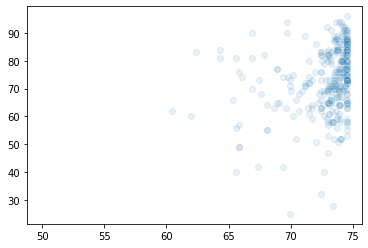

In [96]:
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(50,100,1), np.linspace(50,100,1))

In [97]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [98]:
X_tr = std.transform(X_train.values)

In [99]:
X_te = std.transform(X_test.values)

In [100]:
type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [107]:
lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [108]:
list(zip(X_train.columns, lasso_model.coef_))

[('runtime (mins)', -0.0),
 ('budget', -0.0),
 ('Total_Movies_Lead_Actor_Director', 0.0),
 ('Total_Movies_First_Supporting_Actor_Director', -0.0),
 ('Total_Movies_Second_Supporting_Actor_Director', -0.0),
 ('Buena Vista Pictures', -0.0),
 ('Columbia Pictures', -0.0),
 ('Focus Features', 0.0),
 ('Fox Searchlight Pictures', 0.0),
 ('Miramax', 0.0),
 ('Paramount Pictures', -0.0),
 ('Sony Pictures Classics', 0.0),
 ('Twentieth Century Fox', -0.0),
 ('Universal Pictures', -0.0),
 ('Warner Bros.', -0.0),
 ("Action' 'Adventure", -0.0),
 ("Adventure' 'Drama", -0.0),
 ("Animation' 'Adventure", 0.0),
 ("Biography' 'Drama", 0.0),
 ("Comedy' 'Drama", 0.0),
 ("Crime' 'Drama", 0.0),
 ('Drama', 0.0),
 ("Drama' 'History", -0.0),
 ("Drama' 'Music", -0.0),
 ("Drama' 'Romance", -0.0),
 ('Fall', -0.0),
 ('Spring', -0.0),
 ('Summer', 0.0),
 ('Winter', 0.0),
 ('Brad Pitt', -0.0),
 ('Denzel Washington', -0.0),
 ('Jeff Bridges', -0.0),
 ('Johnny Depp', -0.0),
 ('Leonardo DiCaprio', 0.0),
 ('Matt Damon', 0.0),

In [109]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [110]:
lasso_model.alpha_

0.16831803533309567

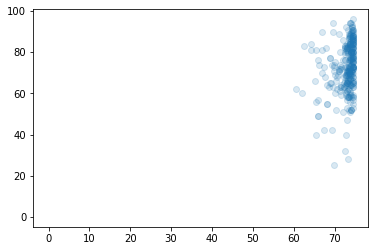

In [113]:
plt.scatter(test_set_pred, y_test, alpha=.16831803533309567)
plt.plot(np.linspace(0,100,1), np.linspace(0,100,1));